# Исследование данных инклинометра в 2012 году

Сами логи скачаны с [диска](https://drive.google.com/drive/u/0/folders/1kfic8qfO1FIycNcYhiD2C_IToPhGyuQJ), все файлы с годом 2012 в названии, и `onboard`, и `ground`.

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import sphere_log_parser as slp

LOGS_DIR = '.\\data\\logs_2012_complete\\'

log_filenames = os.listdir(LOGS_DIR)

Парсинг файлов с помощью `sphere_log_parser`; нас интересуют только поля даты-времени, GPS и инклинометров

In [51]:
tempfile = 'temp.csv'

try:
    df = pd.read_csv(tempfile)
    df['datetime'] = pd.to_datetime(df['datetime'])
except FileNotFoundError:
    df = pd.DataFrame()
    for i, filename in enumerate(log_filenames):
        print(f"\n\n{i}. reading '{filename}''...\n\n")
        df = df.append(
            slp.read_log_to_dataframe(LOGS_DIR+filename, parsing_config=slp.INCLINOMETER_INIT_CONFIG, logging=True),
            ignore_index=True,
        )
    df.sort_values(by='datetime', inplace=True)
    df.to_csv(tempfile)

Фильтрация: удаляем строки с ошибочной датой-временем (1998 год) и с занулёнными значениями инклинометра.

In [52]:
df.set_index('datetime', inplace=True)
df.drop(df.index[df.index < pd.Timestamp('2000')], inplace=True)
df.drop(df.index[(df['Clin1'].abs() < 1e-10) & (df['Clin2'].abs() < 1e-10)], inplace=True)
print(df)

N_lat       E_lon     H_m  GPS_stamp  Clin1  Clin2
datetime                                                                   
2012-03-12 15:33:38        NaN         NaN     NaN         -1    0.7    1.3
2012-03-12 15:33:41        NaN         NaN     NaN         -1    0.7    1.3
2012-03-12 15:33:45  5147.8148  10423.3294   447.7      83213    0.7    1.3
2012-03-12 15:33:48  5147.8148  10423.3294   447.8      83216    0.7    1.3
2012-03-12 15:34:09        NaN         NaN     NaN         -1    0.7    1.3
...                        ...         ...     ...        ...    ...    ...
2012-03-27 00:52:21  5147.8817  10423.3514  1032.3     155218   -3.4    0.3
2012-03-27 00:52:31  5147.8804  10423.3554  1032.0     155228   -3.8    0.3
2012-03-27 00:52:44  5147.8797  10423.3556  1033.2     155241   -3.9    0.6
2012-03-27 00:52:54  5147.8781  10423.3566  1032.8     155251   -3.7    0.6
2012-03-27 06:01:29        NaN         NaN     NaN         -1   -5.6   -0.5

[679 rows x 6 columns]


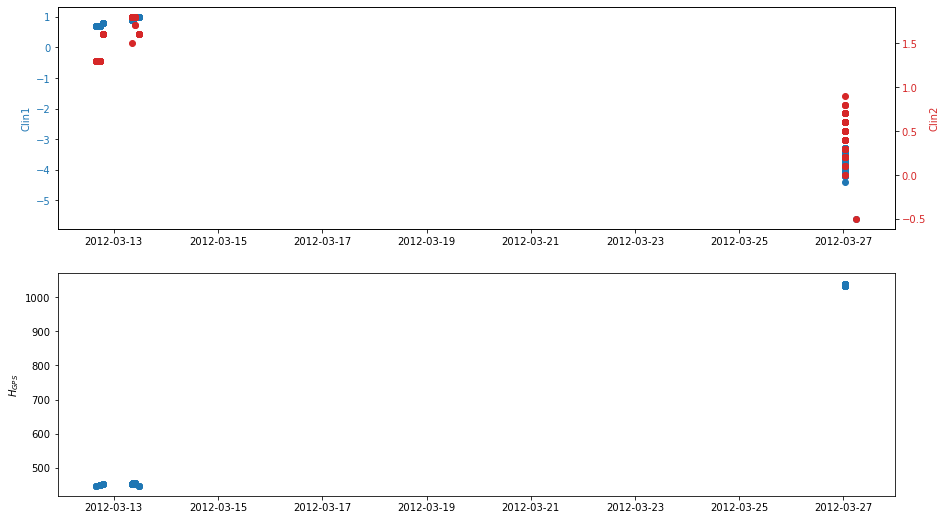

In [53]:
t = df.index.values
clin1 = df['Clin1'].to_numpy()
clin2 = df['Clin2'].to_numpy()
H = df['H_m'].to_numpy()

plt.rcParams["figure.figsize"] =(15,9)
fig = plt.figure()

ax_clin1 = fig.add_subplot(2, 1, 1)
ax_clin2 = ax_clin1.twinx()
ax_H = fig.add_subplot(2, 1, 2, sharex=ax_clin1)

ax_clin1.tick_params(axis='y', labelcolor='tab:blue')
ax_clin1.plot(t, clin1, marker='o', linestyle='none', color='tab:blue')
ax_clin1.set_ylabel('Clin1', color='tab:blue')
ax_clin2.tick_params(axis='y', labelcolor='tab:red')
ax_clin2.plot(t, clin2, marker='o', linestyle='none', color='tab:red')
ax_clin2.set_ylabel('Clin2', color='tab:red')
ax_H.plot(t, H, marker='o', linestyle='none')
ax_H.set_ylabel('$H_{GPS}$')
plt.show()